# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.071099e+01     6.702122e+00
 * time: 0.0044901371002197266
     1     2.803858e+01     4.605685e+00
 * time: 0.013721942901611328
     2     1.962630e+01     4.998167e+00
 * time: 0.03567099571228027
     3     1.305298e+01     1.112815e+00
 * time: 0.06151103973388672
     4     1.251418e+01     2.213371e+00
 * time: 0.07897400856018066
     5     1.207809e+01     1.539992e+00
 * time: 0.0963430404663086
     6     1.154862e+01     1.641238e+00
 * time: 0.11365413665771484
     7     1.088642e+01     1.394292e+00
 * time: 0.18740296363830566
     8     1.023283e+01     1.486578e+00
 * time: 0.20348095893859863
     9     9.765998e+00     7.144355e-01
 * time: 0.2194230556488037
    10     9.546063e+00     4.639447e-01
 * time: 0.2350609302520752
    11     9.414191e+00     8.222505e-01
 * time: 0.2504410743713379
    12     9.327085e+00     7.529346e-01
 * time: 0.2659599781036377
    13     9.235485e+00     6.069957e-01
 * time: 0

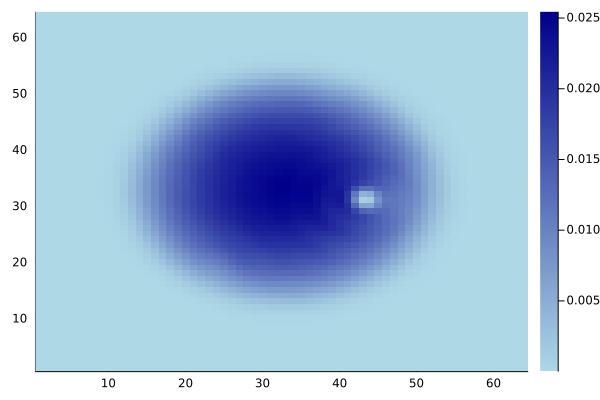

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)